# GPT 4o Mini with v2.13 prompt

This notebook outlines the steps undertook to generate a prediction using GPT 4o Mini with prompt from 2/13/25.

I directly used the same prompt as claude prompt since the two models have similar instruction formats.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from gpt_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import claude_instructions_v213
MODEL_ID = "gpt-4o-mini-2024-07-18"
SYSTEM_PROMPT = claude_instructions_v213

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
len(df)

1084

In [3]:
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 2
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 1
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 0
INFO:root:Completed: 3
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 6
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 7
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 8
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 9
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 O

CPU times: user 47.5 s, sys: 4.17 s, total: 51.7 s
Wall time: 6min 35s


[{'0003.91306_cites_87633.txt': {'model': 'gpt-4o-mini-2024-07-18',
   'input_tokens': 2362,
   'output_tokens': 75,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The passage discusses the rules established in the Target Case but does not indicate any Explicit or Implicit Negative Actions that would suggest it has been overruled. The reference to the Target Case is supportive and reaffirmative, indicating it remains valid.',
   'raw_results': '{\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The passage discusses the rules established in the Target Case but does not indicate any Explicit or Implicit Negative Actions that would suggest it has been overruled. The reference to the Target Case is supportive and reaffirmative, indicating it remains valid."\n}'}},
 {'0002.91306_cites_88994.txt': {'model': 'gpt-4o-mini-2024-07-18',
   'input_tokens': 2825,
   'output_tokens': 68,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The passage discuss

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0003.91306_cites_87633.txt,gpt-4o-mini-2024-07-18,2362,75,no,0.95,The passage discusses the rules established in...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
1,0002.91306_cites_88994.txt,gpt-4o-mini-2024-07-18,2825,68,no,0.95,The passage discusses the Target Case but does...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
2,0001.91306_cites_88061.txt,gpt-4o-mini-2024-07-18,3111,82,yes,0.99,The passage explicitly states that the origina...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.99..."
3,0004.91306_cites_88240.txt,gpt-4o-mini-2024-07-18,2338,73,no,0.95,The passage discusses the Target Case but does...,"{""overruled"":""no"",""confidence"":0.95,""rationale..."
4,0007.91306_cites_89668.txt,gpt-4o-mini-2024-07-18,2334,74,no,0.90,The passage discusses the Target Case but does...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.9,\..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/6.gpt/1.gpt4o_mini_v213_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

0

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/6.gpt/1.gpt4o_mini_v213_prompt.csv")

In [9]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [10]:
assert len(df) == len(prediction_df)

In [11]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,gpt-4o-mini-2024-07-18,3111,82,yes,0.99,The passage explicitly states that the origina...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.99..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,gpt-4o-mini-2024-07-18,2825,68,no,0.95,The passage discusses the Target Case but does...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,gpt-4o-mini-2024-07-18,2362,75,no,0.95,The passage discusses the rules established in...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,gpt-4o-mini-2024-07-18,2338,73,no,0.95,The passage discusses the Target Case but does...,"{""overruled"":""no"",""confidence"":0.95,""rationale..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,gpt-4o-mini-2024-07-18,2340,77,no,0.90,The passage discusses the Target Case but does...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.9,\..."


# Run evaluation

In [12]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [14]:
eval_df["prediction"].value_counts()

prediction
no     789
yes    295
Name: count, dtype: int64

In [15]:
eval_df["input_tokens"].sum()

3736019

In [16]:
eval_df["output_tokens"].sum()

86503

In [17]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [18]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.96      0.81      0.88       935
         Yes       0.39      0.77      0.52       149

    accuracy                           0.80      1084
   macro avg       0.67      0.79      0.70      1084
weighted avg       0.88      0.80      0.83      1084



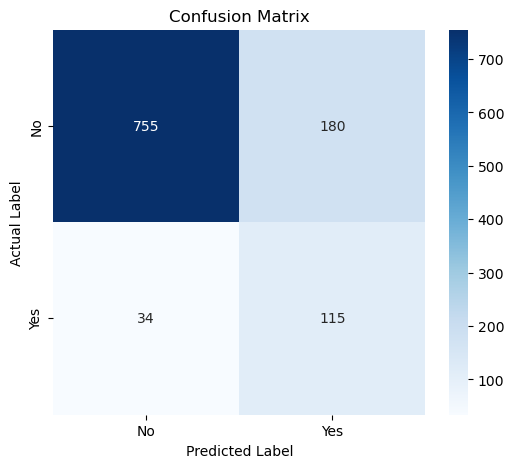

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.80
Precision: 0.39
Recall: 0.77
F-score: 0.52
Specificity: 0.81
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 115
True negatives: 755
False positives: 180
False negatives: 34


In [21]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

180

In [22]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

34

# Save the evaluation df

In [23]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,gpt-4o-mini-2024-07-18,3111,82,yes,0.99,The passage explicitly states that the origina...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.99..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,gpt-4o-mini-2024-07-18,2825,68,no,0.95,The passage discusses the Target Case but does...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,gpt-4o-mini-2024-07-18,2362,75,no,0.95,The passage discusses the rules established in...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,gpt-4o-mini-2024-07-18,2338,73,no,0.95,The passage discusses the Target Case but does...,"{""overruled"":""no"",""confidence"":0.95,""rationale..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,gpt-4o-mini-2024-07-18,2340,77,no,0.90,The passage discusses the Target Case but does...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.9,\..."


In [24]:
eval_df.to_csv("predictions/6.gpt/1.gpt4o_mini_v213_prompt_eval.csv", index=False)